In [1]:
import pandas as pd
from scipy import stats

# 乱数の作成と再現性の確認

In [2]:
stats.uniform.rvs(size=5)

array([0.44697979, 0.97809364, 0.69008559, 0.30860817, 0.41465089])

In [3]:
stats.uniform.rvs(size=5, random_state=3)

array([0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695])

In [4]:
stats.uniform.rvs(size=10, random_state=3)

array([0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695,
       0.89629309, 0.12558531, 0.20724288, 0.0514672 , 0.44080984])

# サンプルデータセットの作成

In [5]:
df = pd.DataFrame()
df['Uni'] = stats.uniform.rvs(size=10000)# 一様乱数
df['Norm'] = stats.norm.rvs(loc=0, scale=1, size=10000)# 正規分布に沿った乱数
df['LogNorm'] = stats.lognorm.rvs(loc=0, s=1, size=10000)# 対数正規分布に沿った乱数
df

,Uni,Norm,LogNorm
0,0.850483,1.433172,0.734015
1,0.915197,0.973236,1.054185
2,0.236055,0.560406,1.763849
3,0.094840,-0.093734,2.727726
4,0.519342,-0.178891,0.162749
...,...,...,...
9995,0.840901,0.502591,0.658827
9996,0.864429,-0.782266,0.251698
9997,0.105437,-0.778215,2.327817
9998,0.835858,-1.162377,0.417832


# 分布を確認

<AxesSubplot:>

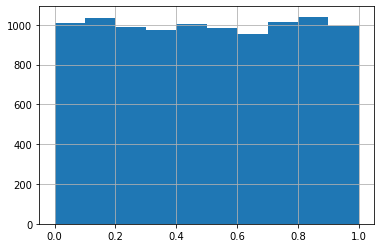

In [6]:
df['Uni'].hist()

<AxesSubplot:>

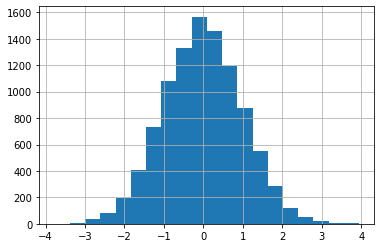

In [7]:
df['Norm'].hist(bins=20)

<AxesSubplot:>

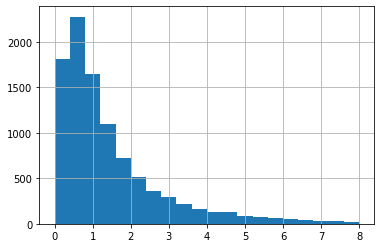

In [8]:
df['LogNorm'].hist(bins=20, range=(0,8))

# 統計処理の為の機能

In [9]:
df.head()

,Uni,Norm,LogNorm
0,0.850483,1.433172,0.734015
1,0.915197,0.973236,1.054185
2,0.236055,0.560406,1.763849
3,0.094840,-0.093734,2.727726
4,0.519342,-0.178891,0.162749


## 方法その1: describeメソッド

In [10]:
r = df.describe()
r

,Uni,Norm,LogNorm
count,10000.000000,10000.000000,10000.000000
mean,0.499933,-0.013306,1.677020
std,0.290175,0.993995,2.169727
min,0.000138,-3.767673,0.025615
25%,0.245148,-0.694958,0.503763
50%,0.498359,-0.020508,0.999646
75%,0.754349,0.655881,1.954188
max,0.999996,3.945360,33.609945


In [11]:
# 指定したカラムの平均値
r.loc['mean', 'Norm']

-0.013305994778471757

In [12]:
r.loc['mean']

Uni        0.499933
Norm      -0.013306
LogNorm    1.677020
Name: mean, dtype: float64

## 方法その2: 個別のメソッド

In [13]:
# 指定したカラムの平均値
df['Norm'].mean()

-0.013305994778471757

In [14]:
# カラム毎の平均値
df.mean()

Uni        0.499933
Norm      -0.013306
LogNorm    1.677020
dtype: float64

### 分散、標準偏差

In [15]:
# 不偏分散
df['Norm'].var()

0.988025154782753

In [16]:
# 標本偏差
df['Norm'].var(ddof=0)

0.9879263522672747

In [17]:
# 不偏標準偏差
df['Norm'].std()

0.9939945446443622

In [18]:
# 標本標準偏差
df['Norm'].std(ddof=0)

0.9939448436745747

### データの個数、最小値、最大値

In [19]:
# データの個数
df['Norm'].count()

10000

In [20]:
# データの最小値
df['Norm'].min()

-3.767672607543519

In [21]:
# データの最大値
df['Norm'].max()

3.9453596964134228

## 分位数の求め方

In [22]:
# 25％分位点
df['Norm'].quantile(q=0.25)

-0.6949579080079984

# 質的データ(カテゴリーデータ)の扱い

In [23]:
sr = pd.Series(['a', 'b', 'b', 'c', 'c', 'c'])
sr

0    a
1    b
2    b
3    c
4    c
5    c
dtype: object

## 要素の集計

In [24]:
sr.value_counts()

c    3
b    2
a    1
dtype: int64

In [25]:
# 最頻値(最多の要素)を調べる
sr.mode()

0    c
dtype: object

### DataFrameの場合の扱い

In [26]:
df = pd.DataFrame()
df['col1'] = sr
df['col2'] = ['a', 'b', 'b', 'b', 'c', 'c']
df['col3'] = ['b', 'b', 'b', 'c', 'c', 'c']
df

,col1,col2,col3
0,a,a,b
1,b,b,b
2,b,b,b
3,c,b,c
4,c,c,c
5,c,c,c


In [27]:
df['col3'].value_counts()

b    3
c    3
Name: col3, dtype: int64

In [28]:
df.mode()

,col1,col2,col3
0,c,b,b
1,NaN,NaN,c
